In [7]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)



# Random boundary

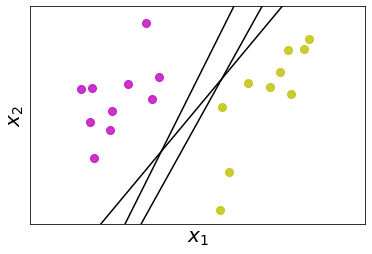

In [7]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)
from matplotlib.backends.backend_pdf import PdfPages

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

with PdfPages('svm1.pdf') as pdf:
    # plot points
    plt.plot(X0[:, 0], X0[:, 1], 'mo', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'yo', markersize = 8, alpha = .8)
    # plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .8)
    plt.axis('equal')
    # axis limits
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # fill region colors
    x1 = np.arange(-10,10,0.1)
    y1 = 2*x1 - 4
    y2 = 1.8*x1 -4
    y3 = 1.2*x1 - 2
    plt.plot(x1, y1, 'k')
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    pdf.savefig()
#     plt.savefig('svm1.png', bbox_inches='tight', dpi = 600)
    plt.show()

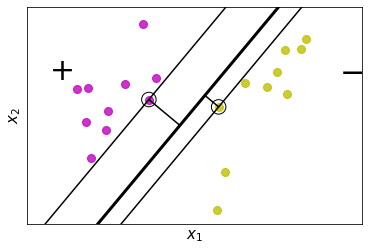

In [9]:
with PdfPages('svm2.pdf') as pdf:
    fig, ax = plt.subplots()

    # plot points
    plt.plot(X0[:, 0], X0[:, 1], 'mo', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'yo', markersize = 8, alpha = .8)
    # plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .8)
    plt.axis('equal')
    # axis limits
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # fill region colors
    x1 = np.arange(-10,10,0.1)
    # y1 = 2*x1 - 4
    # y1 = 1.8*x1 -4
    y1 = 1.2*x1 - 2
    # plt.plot(x1, y1, 'k')
    plt.plot(x1, y1, 'k', linewidth = 3)
    # plt.plot(x1, y3, 'k')

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # perpendicular drawing 
    def perpen(x1, y1, x2, y2, x3, y3):
        # find (x4, y4) in the lind (x1, y1) -- (x2, y2) which is the projection of (x3, y3)
        k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)**2 + (x2-x1)**2)
        x4 = x3 - k * (y2-y1)
        y4 = y3 + k * (x2-x1)
        return (x4, y4)

    def parallel(x1, y1, x2, y2, x3, y3):
        # find y4 and y5 such that the line (x1,y4) -- (x2,y5) parallels with 
        # (x1, y1) -- (x2, y2) and goes through (x3, y3)
        k = (y2 - y1)/(x2 - x1) 
        c = y3 - k*x3 
        y4 = k*x1 + c 
        y5 = k*x2 + c 
        return (y4, y5)

    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]


    S = [0, 12]
    for m in S:
        x3 = X[0, m]
        y3 = X[1, m]
        circle = plt.Circle((x3, y3), 0.1, color='k', fill = False)
        ax.add_artist(circle)
        (x4, y4) = perpen(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([x3, x4], [y3, y4], color = 'k')

        (y5, y6) = parallel(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([xx1, xx2], [y5, y6], color = 'k')

    #plt.text(2.7, 2.6, '$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 50)
    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)

    plt.xlabel('$x_1$', fontsize = 15)
    plt.ylabel('$x_2$', fontsize = 15)

    plt.savefig('svm2.png', bbox_inches='tight', dpi = 600)
    pdf.savefig()
    plt.show()

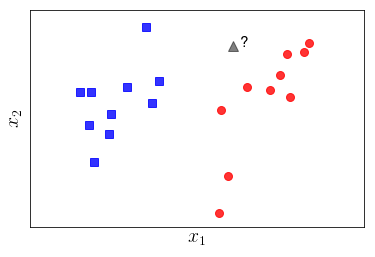

In [10]:
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('pla1.png', bbox_inches='tight', dpi = 300)
plt.show()

In [11]:
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
# X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

from cvxopt import matrix, solvers
# build P
Xbar = np.concatenate((X0, -X1), axis = 0)
print(Xbar.shape)
Q = matrix(Xbar.dot(Xbar.T))
p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(Q, p, G, h, A, b)

l = np.array(sol['x'])

(20, 2)


In [12]:
# calculate w and b
w = Xbar.T.dot(l)
b = 0
NS = 0
S = []

# print(y.shape)

for i in range(2*N):
    if l[i] > 1e-8:
        NS += 1 
        S.append(i)

for n in range(NS):
    tmp = 0 
    for m in range(NS):
        tmp += l[S[m]]*y[:, S[m]]*X[:, S[n]].T.dot(X[:, S[m]])
    b += y[:, S[n]] - tmp 
print(S)
b/= NS 

[0, 2, 12]


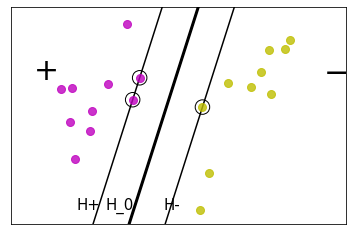

In [28]:
with PdfPages('svm4.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
   # plt.fill_between(x1, y1, color='red', alpha='0.1')
   # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')


    plt.plot(X0[:, 0], X0[:, 1], 'mo', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'yo', markersize = 8, alpha = .8)


    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)

    plt.text(1.6, 0.2, 'H+', fontsize=15)
    plt.text(2, 0.2, 'H_0', fontsize=15)
    plt.text(2.8, 0.2, 'H-', fontsize=15)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)


#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
    plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

In [16]:
with PdfPages('svm3.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')

    S1 = np.arange(0, N)
    S2 = np.arange(0, N)
    plt.plot(X0[S1, 0], X0[S1, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(-.5, 2.5
            )
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)
    plt.text(2.2, 1.2, 'H+', fontsize=15
    # add circles around support vectors 
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

    plt.text(2.2, 1.7, '$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 72)
    plt.text(1.52, 1.1, '$\mathbf{w}^T\mathbf{x}+ b = 1$', fontsize=20, rotation = 72)
    plt.text(2.47, 1.15, '$\mathbf{w}^T\mathbf{x} + b = -1$', fontsize=20, rotation = 72)

#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-16-7c78bf83471c>, line 38)

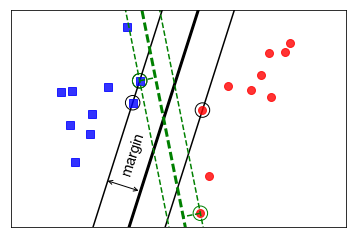

In [22]:
with PdfPages('svm5.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')
    
    
    
    S1 = np.arange(0, 10)
    S2 = np.arange(0, 10)
    plt.plot(X0[S1, 0], X0[S1, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    S = [0, 2, 12]
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)
    
#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]
    
    x3 = 2 
    y3 = .65
    (x4, y4) = perpen(xx1, yy1, xx2, yy2, x3, y3)
    plt.annotate(s='', xy=(x3, y3), xytext=(x4, y4), arrowprops=dict(arrowstyle='<->'))
    
    ############# 
    x1 = np.arange(-10,10,0.1)
    # y1 = 2*x1 - 4
    # y1 = 1.8*x1 -4
    y1 = -5*x1 + 15.5
    # plt.plot(x1, y1, 'k')
    plt.plot(x1, y1, 'g--', linewidth = 3)
    xx1 = x1[0] 
    xx2 = x1[-1]
    yy1 = y1[0]
    yy2 = y1[-1]


    S = [2, 15]
    for m in S:
        x3 = X[0, m]
        y3 = X[1, m]
        circle = plt.Circle((x3, y3), 0.1, color='g', fill = False)
        ax.add_artist(circle)
        (x4, y4) = perpen(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([x3, x4], [y3, y4], 'g', linestyle='--')

        (y5, y6) = parallel(xx1, yy1, xx2, yy2, x3, y3)
        plt.plot([xx1, xx2], [y5, y6], 'g', linestyle='--')
    plt.text(2.2, 1.2, 'margin', fontsize=15, rotation = 72)
    
    
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

##### 

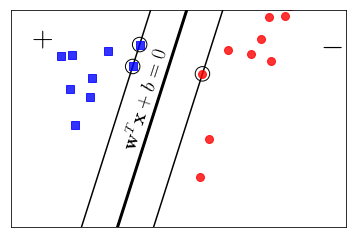

In [21]:
with PdfPages('svm6.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()

    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')


    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    # plt.fill_between(x1, y1, color='red', alpha='0.1')
    # plt.fill_between(x1, y1, y4, color = 'blue', alpha = '.1')

    S1 = np.arange(0, 10)
    S2 = np.arange(0, 10)
    plt.plot(X0[S1, 0], X0[S1, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[S2, 0], X1[S2, 1], 'ro', markersize = 8, alpha = .8)

    plt.axis('equal')
    plt.ylim(-.5, 2.5
            )
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors 
    S = [0, 2, 12]
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

    plt.text(2.2, 1.8, '$\mathbf{w}^T\mathbf{x} + b = 0$', fontsize=20, rotation = 72)
#     plt.text(1.52, 1.25, '$w_1x_1 + w_2x_2 + b = 1$', fontsize=15, rotation = 72)
#     plt.text(2.47, 1.25, '$w_1x_1 + w_2x_2 + b = -1$', fontsize=15, rotation = 72)
    plt.text(1, 2, r'$+$', fontsize=30)
    plt.text(5, 2, r'$-$', fontsize=30)

#     plt.xlabel('$x_1$', fontsize = 20)
#     plt.ylabel('$x_2$', fontsize = 20)
#     plt.savefig('svm3.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()